In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler as sc
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("vgsales.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          999 non-null    int64  
 1   Name          999 non-null    object 
 2   Platform      999 non-null    object 
 3   Year          989 non-null    float64
 4   Genre         999 non-null    object 
 5   Publisher     998 non-null    object 
 6   NA_Sales      999 non-null    object 
 7   EU_Sales      999 non-null    float64
 8   JP_Sales      999 non-null    float64
 9   Other_Sales   999 non-null    float64
 10  Global_Sales  999 non-null    float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.0+ KB


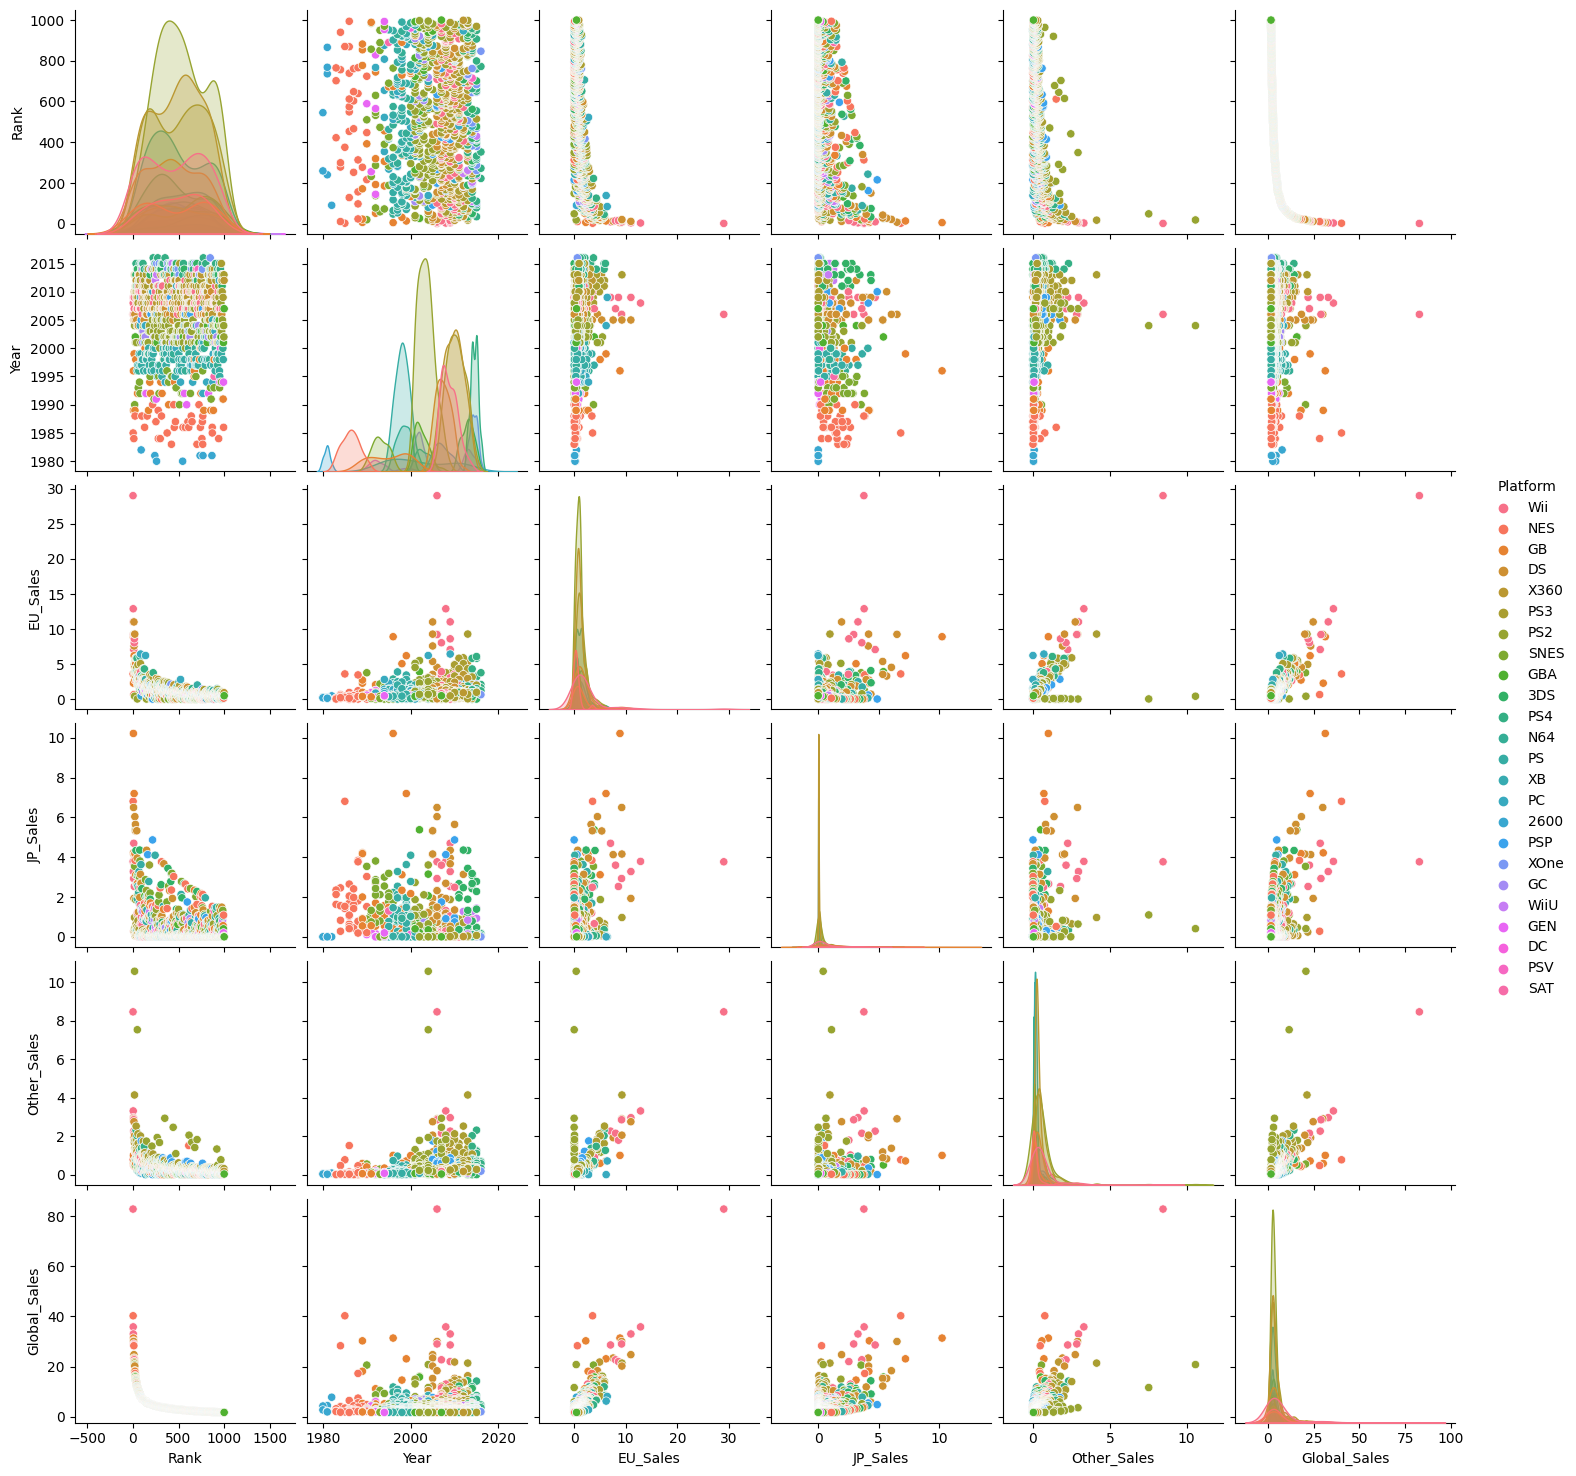

In [ ]:
sns.pairplot(data=df, hue="Platform")

---

In [ ]:
x = df.loc[:,["Edad", "Ingresos Anuales (k$)", "Puntos en compras (1-100)"]]
normalizer = sc()
x_norm = normalizer.fit_transform(x)

In [ ]:
df_norm = pd.DataFrame(x_norm, columns = ["Year", "Global_Sales", "NA_Sales"])
df_norm

,Year,Global_Sales,NA_Sales
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [ ]:
df_norm.describe()

,Year,Global_Sales,NA_Sales
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,-1.021405e-16,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,7.284319e-01,6.656748e-01,8.851316e-01
max,2.235532e+00,2.917671e+00,1.894492e+00


In [ ]:
def startKmeans(k):
  wcss = []
  score = []
  for k in range(2,k) :
    model_k = KMeans(n_clusters = k)
    clusters = model_k.fit_predict(df_norm)
    wcss.append(model_k.inertia_)
    score.append(silhouette_score(x_norm, clusters))
  return wcss, score

In [ ]:
kmax = 10
wcss, score = startKmeans(kmax)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

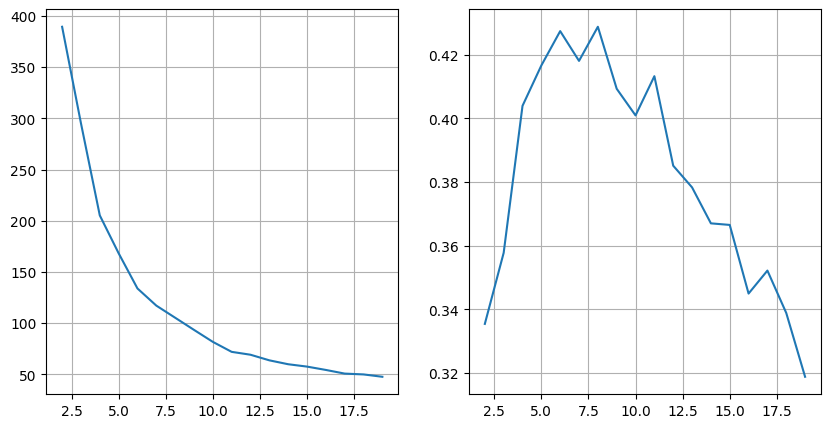

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(range(2,kmax), wcss)
plt.grid(True)

plt.subplot(122)
plt.plot(range(2,kmax), score)
plt.grid(True)

In [ ]:
model_final = KMeans(n_clusters=6)
clusters_final = model_final.fit_predict(df_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df["Cluster"] = pd.Series(clusters_final)
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Cluster
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,3.0
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,3.0
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,4.0
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,3.0
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,Tom Clancy's Ghost Recon,XB,2002.0,Shooter,Ubisoft,1.23,0.46,0.00,0.07,1.76,NaN
995,997,State of Emergency,PS2,2002.0,Action,Take-Two Interactive,0.86,0.67,0.00,0.22,1.76,NaN
996,998,BioShock Infinite,PS3,2013.0,Shooter,Take-Two Interactive,0.72,0.69,0.04,0.31,1.76,NaN
997,999,Hitman: Absolution,X360,2012.0,Action,Square Enix,0.68,0.90,0.01,0.17,1.76,NaN


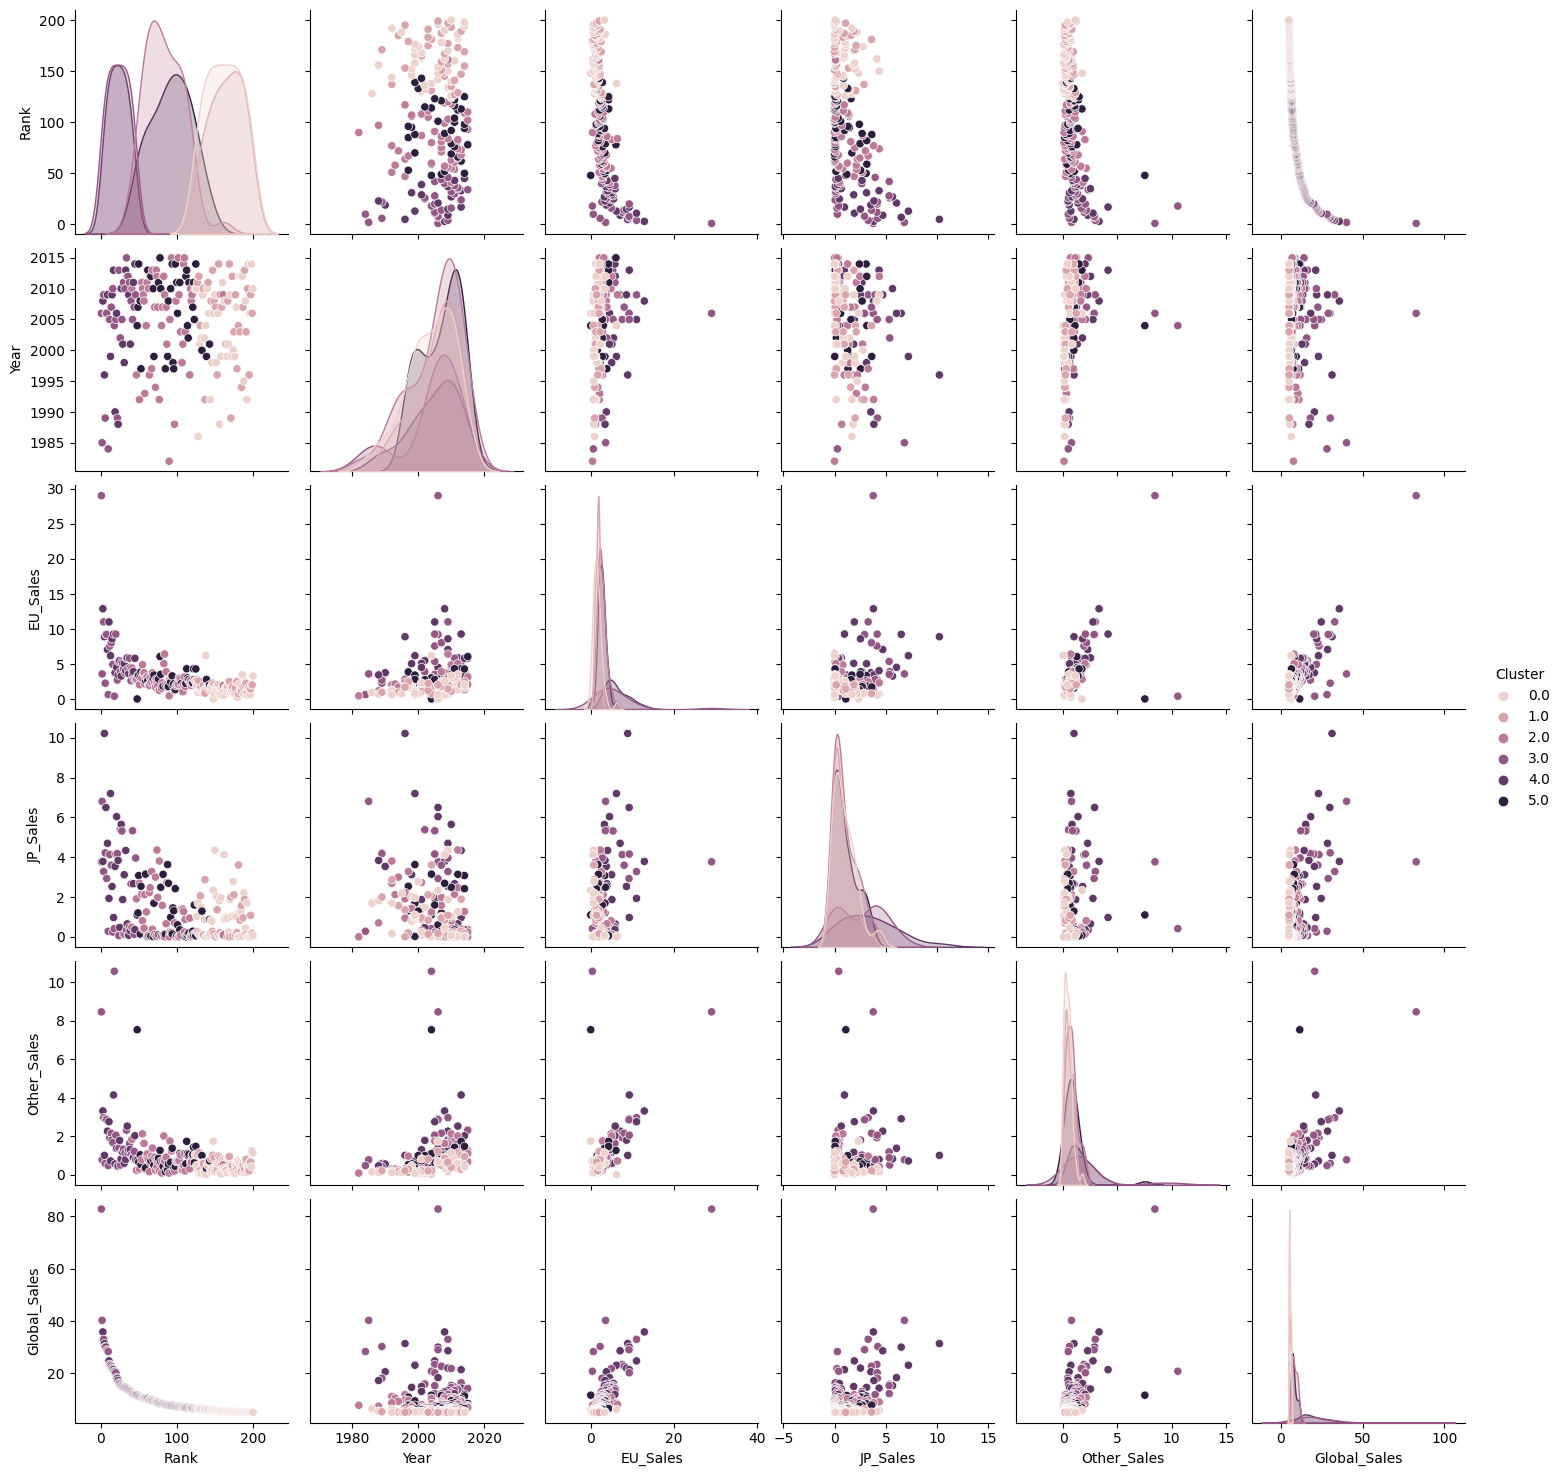

In [ ]:
 sns.pairplot(data=df, hue="Cluster")